# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


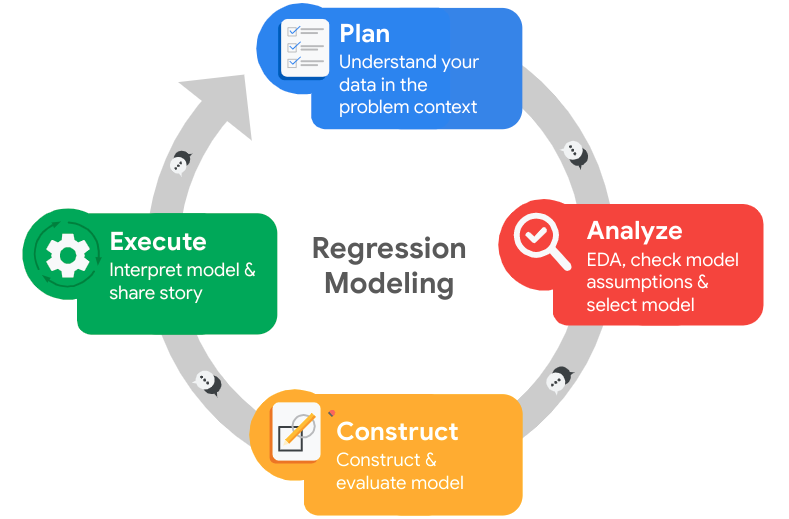

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
pd.set_option("display.max_columns",None)
import pickle 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.rename(columns={'Work_accident':'work_accident',
                    'Department':'department',
                    'left':'exited',
                    'number_project':'number_of_projects',
                    'time_spend_company':'years_worked'},
           inplace=True)


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_montly_hours', 'years_worked', 'work_accident', 'exited',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().any(axis=0)



satisfaction_level       False
last_evaluation          False
number_of_projects       False
average_montly_hours     False
years_worked             False
work_accident            False
exited                   False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates

df0.duplicated().any()


True

In [9]:
# Inspect some rows containing duplicates as
df0[df0.duplicated(keep='first')]# default

,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,years_worked,work_accident,exited,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df=df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df.head()


,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,years_worked,work_accident,exited,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

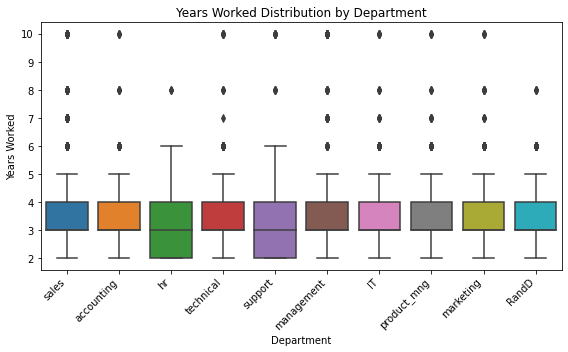

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

 
import seaborn as sns
import matplotlib.pyplot as plt

# Assign the categorical variable to the x-axis
# Assign the numerical variable to the y-axis
plt.figure(figsize=(8,5))
sns.boxplot(
    x='department',
    y='years_worked',
    data=df  # Provide the entire DataFrame as the data source
)

plt.title('Years Worked Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Years Worked')
plt.xticks(rotation=45, ha='right') # Rotates x-axis labels for readability
plt.tight_layout() # Adjusts layout to prevent labels from being cut off
plt.show()

In [12]:
# Determine the number of rows containing outliers

df[df['years_worked'].isin([6, 7, 8, 10])]


,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,years_worked,work_accident,exited,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
#df['exited'].value_counts(normalize=True).mul(100).round(2)
df['exited'].value_counts()
# Get percentages of people who left vs. stayed



0    10000
1     1991
Name: exited, dtype: int64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

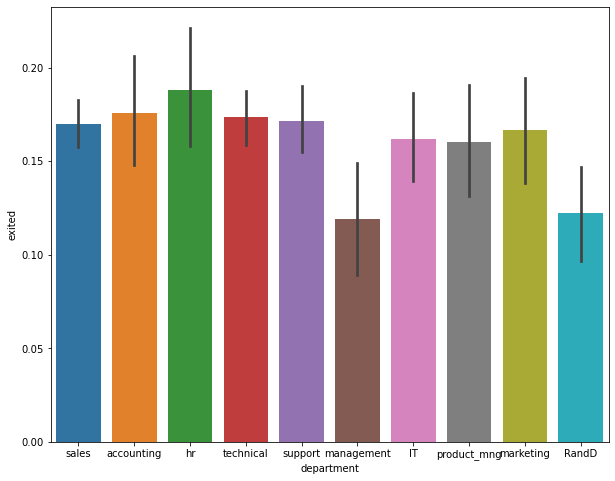

In [14]:
# Create a plot as needed
plt.figure(figsize=(10,8))
sns.barplot(x='department',y='exited',data=df)


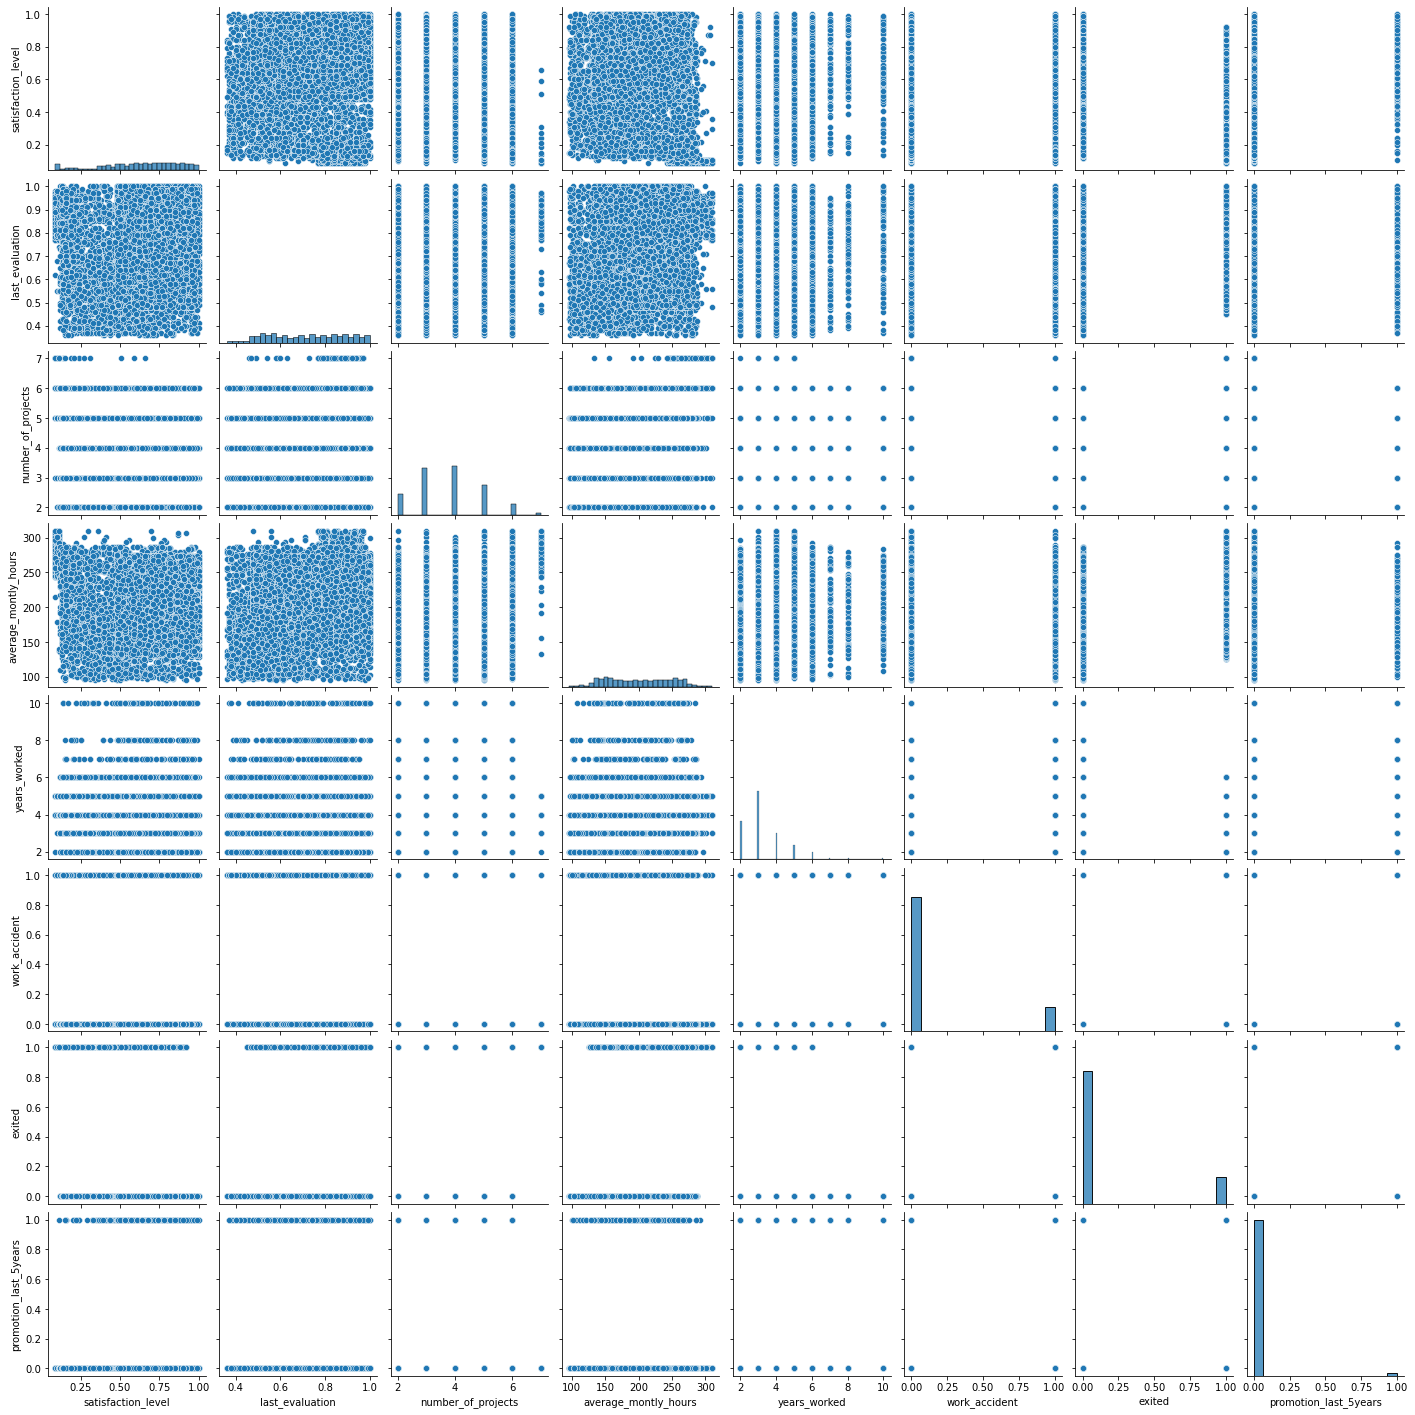

In [15]:
# Create a plot as needed
sns.pairplot(df)

In [16]:
# Create a plot as needed
#df[['salary', 'exited']].value_counts().sort_index()
df[df['exited']==1].groupby(['salary','years_worked']).size()

salary  years_worked
high    3                23
        4                11
        5                14
low     2                12
        3               526
        4               296
        5               273
        6                67
medium  2                19
        3               325
        4               188
        5               195
        6                42
dtype: int64

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
df.groupby(['salary', 'exited']).size()

salary  exited
high    0          942
        1           48
low     0         4566
        1         1174
medium  0         4492
        1          769
dtype: int64

In [18]:
# Create a plot as needed
#df[['department', 'exited']].value_counts(normalize=True).mul(100).round(2)
#df[df['exited']==1]['department'].value_counts(normalize=True).mul(100).round()
#df['department'].value_counts(normalize=True).mul(100).round(1)
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
df.groupby('department')['exited'].value_counts(normalize=True).mul(100).reset_index(name='percent')

,department,exited,percent
0,IT,0,83.811475
1,IT,1,16.188525
2,RandD,0,87.752161
3,RandD,1,12.247839
4,accounting,0,82.447665
5,accounting,1,17.552335
6,hr,0,81.198003
7,hr,1,18.801997
8,management,0,88.073394
9,management,1,11.926606


In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
df.groupby('years_worked')['exited'].value_counts(normalize=True).mul(100).reset_index(name='percent')

,years_worked,exited,percent
0,2,0,98.934708
1,2,1,1.065292
2,3,0,83.159923
3,3,1,16.840077
4,4,0,75.311721
5,4,1,24.688279
6,5,0,54.613936
7,5,1,45.386064
8,6,0,79.889299
9,6,1,20.110701


In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
#df.columns.tolist()

#df[df['exited']==1]['years_worked'].value_counts()
df.groupby('years_worked').size()

years_worked
2     2910
3     5190
4     2005
5     1062
6      542
7       94
8       81
10     107
dtype: int64

In [22]:
df[df['years_worked']>=5].groupby('promotion_last_5years')['exited'].value_counts(normalize=True).mul(100).round(2).reset_index(name='Percent')

,promotion_last_5years,exited,Percent
0,0,0,67.81
1,0,1,32.19
2,1,0,98.11
3,1,1,1.89


In [23]:
df.groupby('salary')['exited'].value_counts(normalize=True).mul(100).round(2).reset_index(name='percent')

,salary,exited,percent
0,high,0,95.15
1,high,1,4.85
2,low,0,79.55
3,low,1,20.45
4,medium,0,85.38
5,medium,1,14.62


In [24]:
list_=df['average_montly_hours'].unique()
len(set(list_))

215

In [25]:
#df['number_of_projects'].unique()
df[df['exited']==1].groupby(['number_of_projects','years_worked'])[['years_worked','exited']].size()


number_of_projects  years_worked
2                   2                 5
                    3               836
                    4                 8
                    5                 8
3                   2                 7
                    3                 5
                    4                15
                    5                 9
                    6                 2
4                   2                 9
                    3                16
                    4                11
                    5               159
                    6                42
5                   2                 5
                    3                 6
                    4                30
                    5               240
                    6                62
6                   2                 4
                    3                 8
                    4               311
                    5                45
                    6                 3
7      

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [43]:
import pandas as pd
df_encoded=pd.get_dummies(df,drop_first=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
def calculate_vif(df):
    X = df.select_dtypes(include=['float64', 'int64','uint8'])
    X_const = sm.add_constant(X)

    vif = pd.DataFrame()
    vif["feature"] = X_const.columns
    vif["VIF"] = [variance_inflation_factor(X_const.values, i)
                  for i in range(X_const.shape[1])]
    return vif
calculate_vif(df_encoded)

,feature,VIF
0,const,65.238126
1,satisfaction_level,1.198347
2,last_evaluation,1.147448
3,number_of_projects,1.231675
4,average_montly_hours,1.174647
5,years_worked,1.097372
6,work_accident,1.017985
7,exited,1.209444
8,promotion_last_5years,1.026193
9,department_RandD,1.615995


In [39]:
df_encoded.corr(method='pearson')

,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,years_worked,work_accident,exited,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,-0.002552,-0.021056,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426,-0.027838,0.018579
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.005448,0.007244,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859,0.010416,-0.000755
number_of_projects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.010077,0.006286,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.000914,0.002484
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.004159,0.001938,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,-0.000675,0.002065
years_worked,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.008380,0.006910,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051,-0.032541,0.016612
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.011793,-0.009178,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.001580,-0.003108
exited,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.029016,0.005955,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,0.099113,-0.047214
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.025610,-0.001497,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,-0.076576,0.041601
department_RandD,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,-0.029016,0.025610,1.000000,-0.057925,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.007301,0.014761
department_accounting,-0.021056,0.007244,0.006286,0.001938,0.006910,-0.009178,0.005955,-0.001497,-0.057925,1.000000,-0.053684,-0.045397,-0.056989,-0.057569,-0.142173,-0.098892,-0.112135,-0.000955,-0.007934


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = df_encoded.drop(["exited"], axis=1)
y = df_encoded["exited"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_l2 = LogisticRegression(
    penalty='l2',
    C=1.0,          # lower C = stronger regularization
    solver='lbfgs',
    max_iter=1000
)

model_l2.fit(X_train_scaled, y_train)

model_l1 = LogisticRegression(
    penalty='l1',
    C=1.0,
    solver='liblinear',
    max_iter=1000
)

model_l1.fit(X_train_scaled, y_train)

coef_df = pd.DataFrame({
    "feature": X.columns,
    "L1_coef": model_l1.coef_[0],
    "L2_coef": model_l2.coef_[0]
})

coef_df

from sklearn.metrics import accuracy_score, classification_report

pred = model_l2.predict(X_test_scaled)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))



0.8340975406419341
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.51      0.18      0.27       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.59      2399
weighted avg       0.80      0.83      0.80      2399



In [42]:
df_encoded.dtypes



satisfaction_level        float64
last_evaluation           float64
number_of_projects          int64
average_montly_hours        int64
years_worked                int64
work_accident               int64
exited                      int64
promotion_last_5years       int64
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
salary_low                  uint8
salary_medium               uint8
dtype: object

In [45]:
X = df_encoded.drop("exited", axis=1)
y = df_encoded["exited"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

model_l2 = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000
)

model_l2.fit(X_train_scaled, y_train)


model_l1 = LogisticRegression(
    penalty='l1',
    C=1.0,
    solver='liblinear',
    max_iter=1000
)

model_l1.fit(X_train_scaled, y_train)


model_en = LogisticRegression(
    penalty='elasticnet',
    l1_ratio=0.5,      # 0 = pure L2, 1 = pure L1
    C=1.0,
    solver='saga',
    max_iter=2000
)

model_en.fit(X_train_scaled, y_train)


import pandas as pd

coef_df = pd.DataFrame({
    "feature": X.columns,
    "L1_coef": model_l1.coef_[0],
    "L2_coef": model_l2.coef_[0],
    "ElasticNet_coef": model_en.coef_[0]
})

coef_df


from sklearn.metrics import accuracy_score, classification_report

for name, model in [
    ("L1", model_l1),
    ("L2", model_l2),
    ("ElasticNet", model_en)
]:
    pred = model.predict(X_test_scaled)
    print(f"\n{name} Model Performance:")
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))



L1 Model Performance:
0.8340975406419341
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.51      0.18      0.27       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.59      2399
weighted avg       0.80      0.83      0.80      2399


L2 Model Performance:
0.8340975406419341
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.51      0.18      0.27       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.59      2399
weighted avg       0.80      0.83      0.80      2399


ElasticNet Model Performance:
0.8340975406419341
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.51      0.18      0.27       401

    accuracy                           0.83     

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Split
X = df_encoded.drop("exited", axis=1)
y = df_encoded["exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
model_none = LogisticRegression(penalty='none', max_iter=2000)
model_l1   = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)
model_l2   = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000)
model_en   = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=3000)

# Fit
model_none.fit(X_train_scaled, y_train)
model_l1.fit(X_train_scaled, y_train)
model_l2.fit(X_train_scaled, y_train)
model_en.fit(X_train_scaled, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "No_Reg": model_none.coef_[0],
    "L1": model_l1.coef_[0],
    "L2": model_l2.coef_[0],
    "ElasticNet": model_en.coef_[0]
})

coef_df


,feature,No_Reg,L1,L2,ElasticNet
0,satisfaction_level,-0.954814,-0.952175,-0.953364,-0.953064
1,last_evaluation,0.113817,0.112355,0.113461,0.112950
2,number_of_projects,-0.309915,-0.306997,-0.308827,-0.308052
3,average_montly_hours,0.190171,0.188608,0.189693,0.189211
4,years_worked,0.407153,0.404983,0.406217,0.405750
5,work_accident,-0.483017,-0.480175,-0.481825,-0.481245
6,promotion_last_5years,-0.157260,-0.154493,-0.156892,-0.155820
7,department_RandD,-0.083566,-0.086706,-0.083584,-0.085088
8,department_accounting,0.007860,0.002794,0.007709,0.005359
9,department_hr,0.046447,0.041633,0.046382,0.044113


In [48]:
eliminated = coef_df[coef_df["L1"] == 0]["feature"]
kept = coef_df[coef_df["L1"] != 0]["feature"]

print("✅ Features eliminated by L1:")
print(eliminated.tolist())

print("\n✅ Features kept by L1:")
print(kept.tolist())


✅ Features eliminated by L1:
[]

✅ Features kept by L1:
['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_montly_hours', 'years_worked', 'work_accident', 'promotion_last_5years', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_low', 'salary_medium']


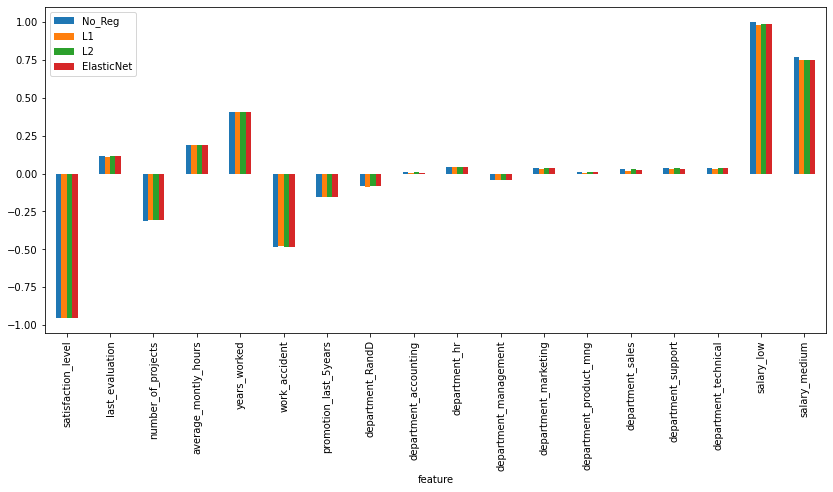

In [49]:
coef_df.set_index("feature").plot(kind="bar", figsize=(14,6))


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',   # important for your dataset
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Performance:")
print(accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Performance:
0.9783243017924135
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.89      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [51]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("XGBoost Performance:")
print(accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


XGBoost Performance:
0.9758232596915382
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.95      0.91      0.93       401

    accuracy                           0.98      2399
   macro avg       0.96      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [52]:
import pandas as pd
import numpy as np

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

rf_importance


,feature,importance
0,satisfaction_level,0.277935
4,years_worked,0.236055
2,number_of_projects,0.154537
3,average_montly_hours,0.154200
1,last_evaluation,0.133454
5,work_accident,0.009260
16,salary_low,0.007874
17,salary_medium,0.004170
13,department_sales,0.004166
15,department_technical,0.003668


In [53]:
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=False)

xgb_importance


,feature,importance
4,years_worked,0.291488
0,satisfaction_level,0.193720
2,number_of_projects,0.097648
1,last_evaluation,0.071380
3,average_montly_hours,0.054751
5,work_accident,0.045547
16,salary_low,0.033703
17,salary_medium,0.031665
13,department_sales,0.023731
9,department_hr,0.022722


In [54]:
import pandas as pd

# Random Forest importance (your data)
rf_importance = pd.DataFrame({
    'feature': [
        'satisfaction_level','years_worked','number_of_projects','average_montly_hours',
        'last_evaluation','work_accident','salary_low','salary_medium','department_sales',
        'department_hr','department_product_mng','department_management','department_accounting',
        'department_RandD','department_marketing','department_technical','department_support',
        'promotion_last_5years'
    ],
    'rf_importance': [
        0.277935,0.236055,0.154537,0.154200,0.133454,0.009260,0.007874,0.004170,0.004166,
        0.003668,0.002966,0.002098,0.001833,0.001830,0.001798,0.001569,0.001375,0.001212
    ]
})

# XGBoost importance (your data)
xgb_importance = pd.DataFrame({
    'feature': [
        'years_worked','satisfaction_level','number_of_projects','last_evaluation',
        'average_montly_hours','work_accident','salary_low','salary_medium','department_sales',
        'department_hr','department_product_mng','department_management','department_accounting',
        'department_RandD','department_marketing','department_technical','department_support',
        'promotion_last_5years'
    ],
    'xgb_importance': [
        0.291488,0.193720,0.097648,0.071380,0.054751,0.045547,0.033703,0.031665,0.023731,
        0.022722,0.019402,0.018551,0.016854,0.016846,0.016657,0.016333,0.015114,0.013887
    ]
})

# Merge
comparison = rf_importance.merge(xgb_importance, on='feature')

# Sort by average importance
comparison['avg_importance'] = (comparison['rf_importance'] + comparison['xgb_importance']) / 2
comparison = comparison.sort_values(by='avg_importance', ascending=False)

comparison


,feature,rf_importance,xgb_importance,avg_importance
1,years_worked,0.236055,0.291488,0.263771
0,satisfaction_level,0.277935,0.193720,0.235827
2,number_of_projects,0.154537,0.097648,0.126092
3,average_montly_hours,0.154200,0.054751,0.104475
4,last_evaluation,0.133454,0.071380,0.102417
5,work_accident,0.009260,0.045547,0.027403
6,salary_low,0.007874,0.033703,0.020788
7,salary_medium,0.004170,0.031665,0.017917
8,department_sales,0.004166,0.023731,0.013948
9,department_hr,0.003668,0.022722,0.013195


In [55]:
import pandas as pd

# -----------------------------
# 1. Your merged importance table
# -----------------------------
comparison = pd.DataFrame({
    'feature': [
        'years_worked','satisfaction_level','number_of_projects','average_montly_hours',
        'last_evaluation','work_accident','salary_low','salary_medium','department_sales',
        'department_hr','department_product_mng','department_management','department_accounting',
        'department_RandD','department_marketing','department_technical','department_support',
        'promotion_last_5years'
    ],
    'rf_importance': [
        0.236055,0.277935,0.154537,0.154200,0.133454,0.009260,0.007874,0.004170,0.004166,
        0.003668,0.002966,0.002098,0.001833,0.001830,0.001798,0.001569,0.001375,0.001212
    ],
    'xgb_importance': [
        0.291488,0.193720,0.097648,0.054751,0.071380,0.045547,0.033703,0.031665,0.023731,
        0.022722,0.019402,0.018551,0.016854,0.016846,0.016657,0.016333,0.015114,0.013887
    ]
})

# Compute average importance
comparison['avg_importance'] = (comparison['rf_importance'] + comparison['xgb_importance']) / 2

# -----------------------------
# 2. Define interpretation rules
# -----------------------------
def rank_label(rf, xgb):
    if rf > 0.15 or xgb > 0.15:
        return "very high"
    if rf > 0.10 or xgb > 0.10:
        return "high"
    if rf > 0.03 or xgb > 0.03:
        return "medium"
    return "low"

def interpretation(feature):
    mapping = {
        'years_worked': "Strongest driver of attrition",
        'satisfaction_level': "Emotional driver of attrition",
        'number_of_projects': "Workload pressure",
        'average_montly_hours': "Burnout indicator",
        'last_evaluation': "High performers leaving",
        'work_accident': "XGB sees more signal here",
        'salary_low': "Salary matters but not primary",
        'salary_medium': "Salary matters but not primary",
        'promotion_last_5years': "Minor effect",
    }
    if "department" in feature:
        return "Department doesn’t drive attrition"
    return mapping.get(feature, "Minor effect")

# -----------------------------
# 3. Apply rules
# -----------------------------
comparison['Avg Rank'] = comparison.apply(
    lambda row: rank_label(row['rf_importance'], row['xgb_importance']),
    axis=1
)

comparison['Interpretation'] = comparison['feature'].apply(interpretation)

# -----------------------------
# 4. Sort by avg importance
# -----------------------------
comparison = comparison.sort_values(by='avg_importance', ascending=False)

comparison


,feature,rf_importance,xgb_importance,avg_importance,Avg Rank,Interpretation
0,years_worked,0.236055,0.291488,0.263771,very high,Strongest driver of attrition
1,satisfaction_level,0.277935,0.193720,0.235827,very high,Emotional driver of attrition
2,number_of_projects,0.154537,0.097648,0.126092,very high,Workload pressure
3,average_montly_hours,0.154200,0.054751,0.104475,very high,Burnout indicator
4,last_evaluation,0.133454,0.071380,0.102417,high,High performers leaving
5,work_accident,0.009260,0.045547,0.027403,medium,XGB sees more signal here
6,salary_low,0.007874,0.033703,0.020788,medium,Salary matters but not primary
7,salary_medium,0.004170,0.031665,0.017917,medium,Salary matters but not primary
8,department_sales,0.004166,0.023731,0.013948,low,Department doesn’t drive attrition
9,department_hr,0.003668,0.022722,0.013195,low,Department doesn’t drive attrition


1. Attrition is driven by tenure and stagnation
Employees with long tenure and no growth are the most likely to leave.

⭐ 2. Dissatisfaction is the emotional trigger
Low satisfaction is the second‑strongest predictor.

This is where HR should intervene first.

⭐ 3. Workload is a major operational driver
Too many projects

Too many hours

High evaluation (high performers)

This is a classic burnout pattern.

⭐ 4. Salary matters, but only in combination with workload
Salary alone is not a top driver — it interacts with other factors.

⭐ 5. Department does NOT drive attrition
This is a company‑wide cultural/workload issue, not a department issue.

⭐ 6. Promotion history has minimal impact
It helps, but it’s not a major driver compared to satisfaction and workload.

 https://copilot.microsoft.com/shares/fhjwASjWBBnXuvpxDUzTa  # random forest model
https://copilot.microsoft.com/shares/SATFb74yJHJjxd2959XQD  # xgb model

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.